In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
%matplotlib inline

file1 = open('all_nmr_data.dat', 'r')
lines = file1.readlines()
data0 = []
data2c = []
data2cn = []
data4c = []
data4cn = []
data6c = []
data6cn = []

for i in range(2,len(lines)):
    value = lines[i].split()
#    print(value[0])
    data0.append(float(value[0]))
    data2c.append(float(value[1]))
    data2cn.append(float(value[2]))
    data4c.append(float(value[3]))
    data4cn.append(float(value[4]))
    data6c.append(float(value[5]))
    data6cn.append(float(value[6]))
#data = np.array(data)
#print(data0, '\n', data2c)
final_data = []
for j in [data0, data2c, data2cn, data4c, data4cn, data6c, data6cn]:
    final_data.append(j)


In [7]:
names = [f'tensor_{x}' for x in range(7)]
names = [
    'reference',
    '2.5 core',
    '2.5 core-Na',
    '4.0 core',
    '4.0 core-Na',
    '6.0 core',
    '6.0 core-Na',
]

In [20]:
df = pd.DataFrame(
    np.array(final_data).T,
    columns=names,
)
df = df.melt(value_vars=names)

df.head()

,variable,value
0,reference,539.7794
1,reference,527.7288
2,reference,534.8223
3,reference,522.5524
4,reference,530.0681


In [ ]:
df['core'] = df[]

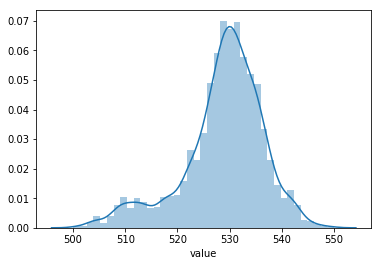

In [9]:
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
sns.distplot(
    a=df['value'],
)

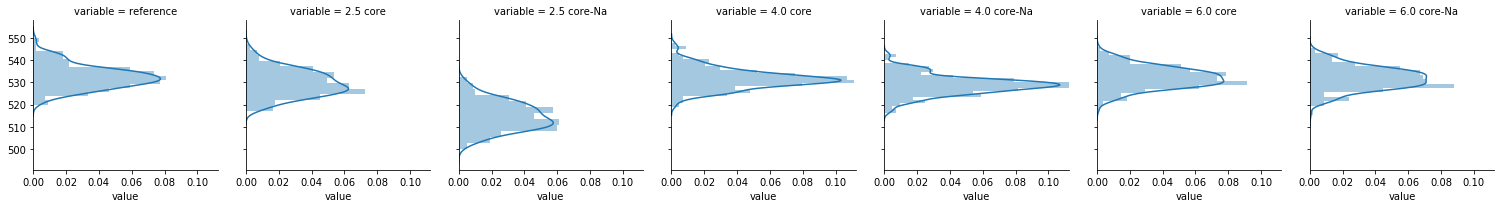

In [18]:
g = sns.FacetGrid(df, col="variable")
g = g.map(
    sns.distplot, 
    "value", 
    vertical=True
)

In [35]:
ref_df = df.loc[df['variable'] == 'reference']
core_Na_df = df.loc[df['variable'].str.contains('(core-)\w+')]
core_df = df.loc[df['variable'].str.contains('(core)(?!-Na)')]

/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
core_df['variable'].unique()

array(['2.5 core', '4.0 core', '6.0 core'], dtype=object)

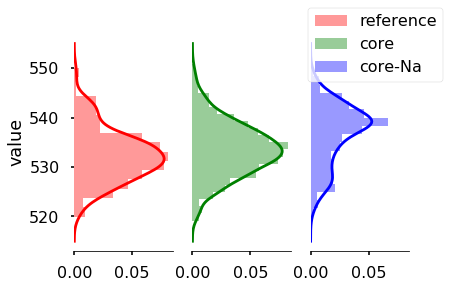

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True)
sns.despine(left=True, right=True)

sns.distplot(
    ref_df["value"],
    vertical=True,
    ax=ax1,
    label='reference',
    color='r'
)

sns.distplot(
    core_df["value"],
    vertical=True,
    label='core',
    ax=ax2,
    color='g'
)
ax2.yaxis.set_visible(False)

sns.distplot(
    core_Na_df["value"],
    vertical=True,
    label='core-Na',
    ax=ax3,
    color='b'
)
ax3.yaxis.set_visible(False)

fig.legend()


[532.3623196551724, 529.5822844827586, 514.8220389655172, 531.4754079310345, 528.8518751724138, 532.1471965517242, 531.7928593103449] [0.30404484339093857, 0.3395759619279792, 0.36531010808374487, 0.26653295143316785, 0.2553579156143604, 0.27677930188867694, 0.2919507847274723]


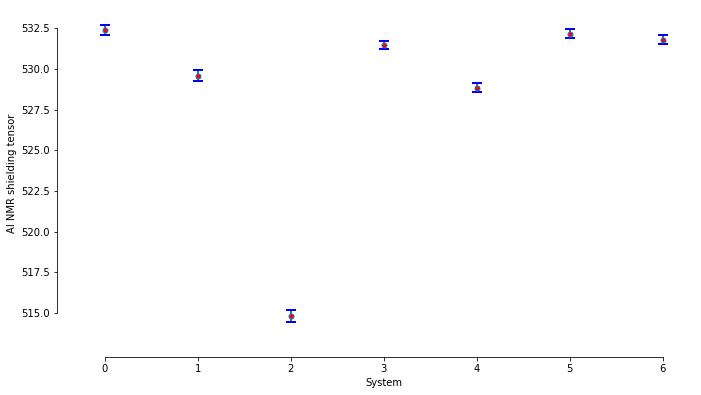

In [52]:
data0 = np.array(data0)
data2c = np.array(data2c)
data2cn = np.array(data2cn)
data4c = np.array(data4c)
data4cn = np.array(data4cn)
data6c = np.array(data6c)
data6cn = np.array(data6cn)
sample = 300
mean_values = [data0.mean(), data2c.mean(), data2cn.mean(), data4c.mean(), data4cn.mean(), data6c.mean(), data6cn.mean()]
std_values = [data0.std()/math.sqrt(sample), data2c.std()/math.sqrt(sample), data2cn.std()/math.sqrt(sample), data4c.std()/math.sqrt(sample), data4cn.std()/math.sqrt(sample), data6c.std()/math.sqrt(sample), data6cn.std()/math.sqrt(sample)]

print(mean_values, std_values)

y = np.array([data0.mean(), data2c.mean(), data2cn.mean(), data4c.mean(), data4cn.mean(), data6c.mean(), data6cn.mean()])
x = np.array([10, 20, 30, 40, 50, 60, 70])
e = np.array([data0.std()/math.sqrt(sample), data2c.std()/math.sqrt(sample), data2cn.std()/math.sqrt(sample), data4c.std()/math.sqrt(sample), data4cn.std()/math.sqrt(sample), data6c.std()/math.sqrt(sample), data6cn.std()/math.sqrt(sample)])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
label = ['0', '1', '2', '3', '4', '5', '6']
plt.xticks(x, label)
(_, caps, _) = plt.errorbar(x, y, e, linestyle='None', fmt='o', mfc='red', capsize=5, elinewidth=2, markersize=5,)

#plt.plot(x, [532.4142, 532.4142, 532.4142, 532.4142, 532.4142], linestyle='-', linewidth=2  )
for cap in caps:
    cap.set_color('blue')
    cap.set_markeredgewidth(2)

axes.set_ylabel('Al NMR shielding tensor')
axes.set_xlabel('System')

sns.despine()
sns.despine(offset=20, trim=True)
sns.set_context("poster")

plt.show()
fig.savefig('al_nmr_normal.png',  bbox_inches='tight')

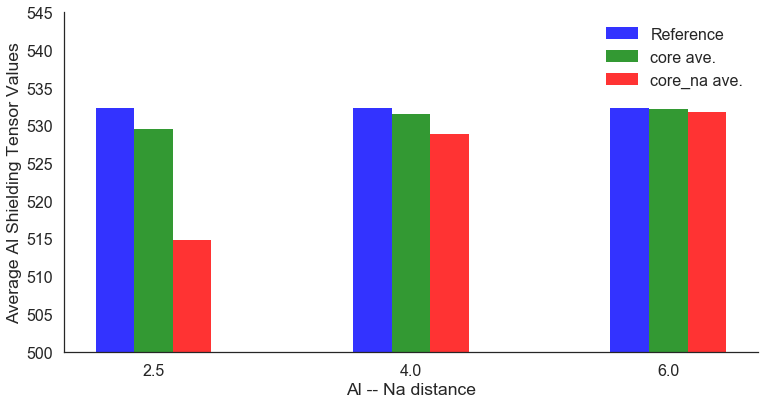

In [50]:
n_groups = 3

# data to plot 
reference = (data0.mean(), data0.mean(), data0.mean())
core_mean = (data2c.mean(), data4c.mean(), data6c.mean())
core_na_mean = (data2cn.mean(), data4cn.mean(), data6cn.mean()) 

#create plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, reference, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Reference')
 
rects2 = plt.bar(index + bar_width, core_mean, bar_width,
                 alpha=opacity,
                 color='g',
                 label='core ave.')


rects3 = plt.bar(index + bar_width + bar_width, core_na_mean, bar_width,
                 alpha=opacity,
                 color='r',
                 label='core_na ave.')

plt.xlabel('Al -- Na distance')
plt.ylabel('Average Al Shielding Tensor Values')
#plt.title('')
plt.xticks(index + bar_width, ('2.5', '4.0', '6.0'))
plt.legend()
plt.ylim((500,545))
sns.despine()
#sns.despine(offset=20, trim=True)
sns.set_context("poster")

plt.tight_layout()
plt.show()
fig.savefig('al_nmr_plot_bar01_graph.png',  bbox_inches='tight')
 


reference data mean=  532.362319655     reference data stdev=  5.26621116532
-2.78003517241 -0.886911724138 -0.215123103448
0.339575961928 0.266532951433 0.276779301889
-17.5402806897 -3.51044448276 -0.569460344828
0.365310108084 0.255357915614 0.291950784727
-14.7602455172 -2.62353275862 -0.354337241379


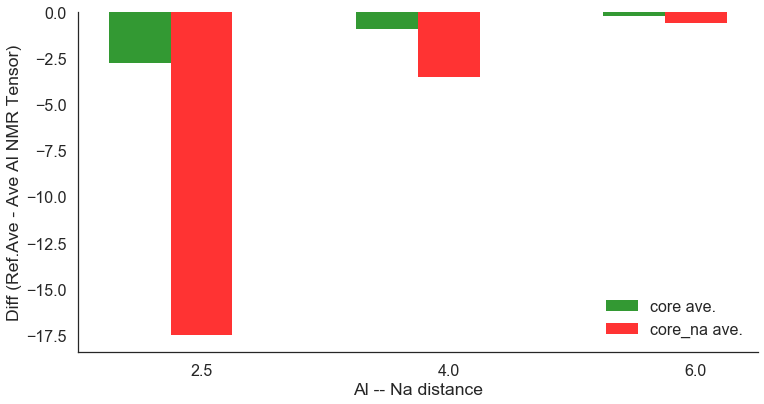

In [51]:
data0_diff = data0 - data0.mean()
data2c_diff = data2c - data0.mean()
data2cn_diff = data2cn - data0.mean()
data_2c_2cn_diff = data2cn_diff - data2c_diff.mean()
data4c_diff = data4c - data0.mean()
data4cn_diff = data4cn - data0.mean()
data_4c_4cn_diff = data4cn_diff - data4c_diff.mean()
data6c_diff = data6c - data0.mean()
data6cn_diff = data6cn - data0.mean()
data_6c_6cn_diff = data6cn_diff - data6c_diff.mean()

#print(data2c.mean()-data0.mean(), data2cn.mean()-data0.mean() )
n_groups = 3
sample = 300
# data to plot 
#reference = (data0.mean(), data0.mean(), data0.mean())
core_mean = (data2c_diff.mean(), data4c_diff.mean(), data6c_diff.mean())
core_na_mean = (data2cn_diff.mean(), data4cn_diff.mean(), data6cn_diff.mean())
print('reference data mean= ', data0.mean(), '   ', 'reference data stdev= ', data0.std())
print(data2c_diff.mean(), data4c_diff.mean(), data6c_diff.mean())
print(data2c_diff.std()/math.sqrt(sample), data4c_diff.std()/math.sqrt(sample), data6c_diff.std()/math.sqrt(sample))
print(data2cn_diff.mean(), data4cn_diff.mean(), data6cn_diff.mean())
print(data2cn_diff.std()/math.sqrt(sample), data4cn_diff.std()/math.sqrt(sample), data6cn_diff.std()/math.sqrt(sample))
print(data_2c_2cn_diff.mean(), data_4c_4cn_diff.mean(), data_6c_6cn_diff.mean() )
#create plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

#rects1 = plt.bar(index, reference, bar_width,
#                 alpha=opacity,
#                 color='b',
#                 label='Reference')
 
rects1 = plt.bar(index, core_mean, bar_width,
                 alpha=opacity,
                 color='g',
                 label='core ave.')


rects2 = plt.bar(index + bar_width, core_na_mean, bar_width,
                 alpha=opacity,
                 color='r',
                 label='core_na ave.')

plt.xlabel('Al -- Na distance')
plt.ylabel('Diff (Ref.Ave - Ave Al NMR Tensor)')
#plt.title('')
plt.xticks(index + bar_width, ('2.5', '4.0', '6.0'))
plt.legend()
#plt.ylim((500))
sns.despine()
#sns.despine(offset=20, trim=True)
sns.set_context("poster")

plt.tight_layout()
plt.show()
fig.savefig('al_nmr_plot_bar_diff_graph.png',  bbox_inches='tight')

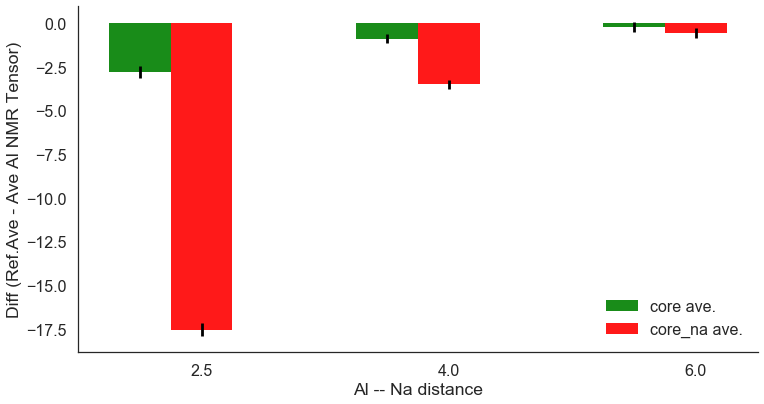

In [52]:
#print(data2c.mean()-data0.mean(), data2cn.mean()-data0.mean() )
n_groups = 3

# data to plot 
#reference = (data0.mean(), data0.mean(), data0.mean())
core_mean = (data2c_diff.mean(), data4c_diff.mean(), data6c_diff.mean())
core_na_mean = (data2cn_diff.mean(), data4cn_diff.mean(), data6cn_diff.mean()) 
core_mean_std = (data2c_diff.std()/math.sqrt(sample), data4c_diff.std()/math.sqrt(sample), data6c_diff.std()/math.sqrt(sample))
core_na_mean_std = (data2cn_diff.std()/math.sqrt(sample), data4cn_diff.std()/math.sqrt(sample), data6cn_diff.std()/math.sqrt(sample)) 

#create plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.9

#rects1 = plt.bar(index, reference, bar_width,
#                 alpha=opacity,
#                 color='b',
#                 label='Reference')
 
rects1 = plt.bar(index, core_mean, bar_width,
                 alpha=opacity,
                 color='g',
                 label='core ave.',
                 yerr=core_mean_std)


rects2 = plt.bar(index + bar_width, core_na_mean, bar_width,
                 alpha=opacity,
                 color='r',
                 label='core_na ave.',
                 yerr=core_na_mean_std)

plt.xlabel('Al -- Na distance')
plt.ylabel('Diff (Ref.Ave - Ave Al NMR Tensor)')
#plt.title('')
plt.xticks(index + bar_width, ('2.5', '4.0', '6.0'))
plt.legend()
#plt.ylim((500))
sns.despine()
#sns.despine(offset=20, trim=True)
sns.set_context("poster")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=4)

plt.tight_layout()
plt.show()

fig.savefig('al_nmr_plot_bar_diff_std_graph.png',  bbox_inches='tight')


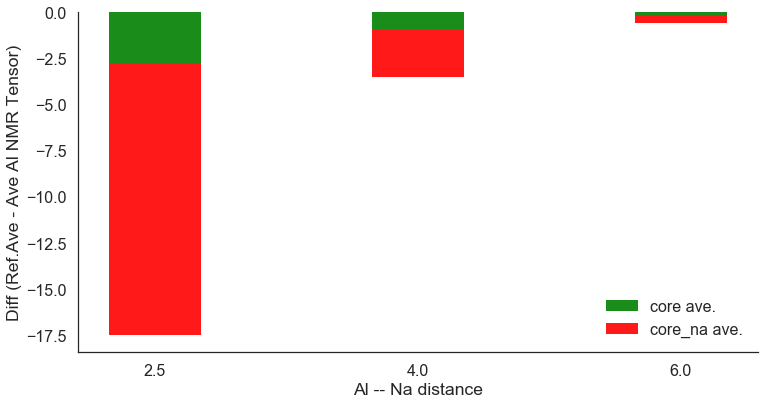

In [55]:
N = 3

core_mean = (data2c_diff.mean(), data4c_diff.mean(), data6c_diff.mean())
core_na_mean = (data_2c_2cn_diff.mean(), data_4c_4cn_diff.mean(), data_6c_6cn_diff.mean()) 
core_mean_std = (data2c_diff.std(), data4c_diff.std(), data6c_diff.std())
core_na_mean_std = (data_2c_2cn_diff.std(), data_4c_4cn_diff.std(), data_6c_6cn_diff.std()) 

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.35       # the width of the bars: can also be len(x) sequence

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))

rects1 = plt.bar(ind, core_mean, bar_width,
                 alpha=opacity,
                 color='g',
                 label='core ave.')


rects2 = plt.bar(ind, core_na_mean, bar_width,
                 alpha=opacity,
                 bottom=core_mean,
                 color='r',
                 label='core_na ave.')

plt.xlabel('Al -- Na distance')
plt.ylabel('Diff (Ref.Ave - Ave Al NMR Tensor)')
#plt.title('')
plt.xticks(ind, ('2.5', '4.0', '6.0'))
plt.legend()
#plt.ylim((500))
sns.despine()
#sns.despine(offset=20, trim=True)
sns.set_context("poster")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=4)

plt.tight_layout()
plt.show()
fig.savefig('al_nmr_plot_bar_diff_stacked_graph.png',  bbox_inches='tight')

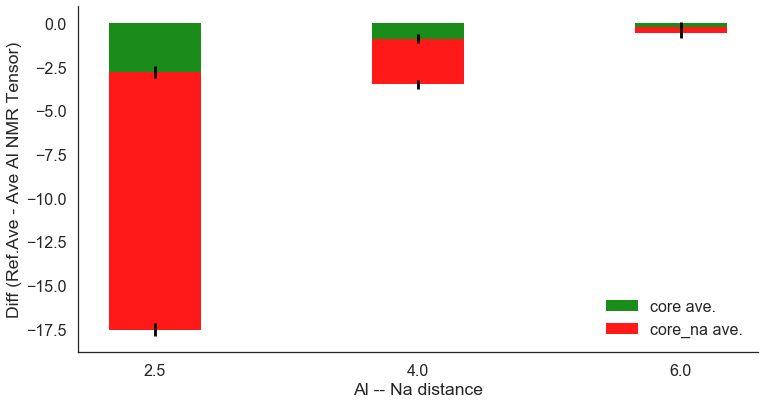

In [56]:
N = 3

core_mean = (data2c_diff.mean(), data4c_diff.mean(), data6c_diff.mean())
core_na_mean = (data_2c_2cn_diffmean, data_4c_4cn_diffmean, data_6c_6cn_diffmean) 
core_mean_std = (data2c_diff.std()/math.sqrt(sample), data4c_diff.std()/math.sqrt(sample), data6c_diff.std()/math.sqrt(sample))
core_na_mean_std = (data_2c_2cn_diff.std()/math.sqrt(sample), data_4c_4cn_diff.std()/math.sqrt(sample), data_6c_6cn_diff.std()/math.sqrt(sample)) 

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.35       # the width of the bars: can also be len(x) sequence

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))

rects1 = plt.bar(ind, core_mean, bar_width,
                 alpha=opacity,
                 color='g',
                 label='core ave.',
                 yerr=core_mean_std)


rects2 = plt.bar(ind, core_na_mean, bar_width,
                 alpha=opacity,
                 bottom=core_mean,
                 color='r',
                 label='core_na ave.',
                 yerr=core_na_mean_std  )

plt.xlabel('Al -- Na distance')
plt.ylabel('Diff (Ref.Ave - Ave Al NMR Tensor)')
#plt.title('')
plt.xticks(ind, ('2.5', '4.0', '6.0'))
plt.legend()
#plt.ylim((500))
sns.despine()
#sns.despine(offset=20, trim=True)
sns.set_context("poster")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=4)

plt.tight_layout()
plt.show()
fig.savefig('al_nmr_plot_bar_diff_stacked_std_graph.png',  bbox_inches='tight')

In [22]:
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
#axes.violinplot(final_data, showmeans=True, showextrema=False)
#axes[1].violinplot(data2c, showmeans=True, showextrema=False)
#axes[2].violinplot(data2cn, showmeans=True, showextrema=False)
#plt.show()
#plt.gcf().clear()
#axes[1].set_title('Custom violinplot 1', fontsize=fs)